11月3日に[「米国株 オンライン勉強会3回目(9/21の繰り返し)」](https://kinyuzaimu.connpass.com/event/190048/)、[「米国株 オンライン勉強会4回目(9/21の繰り返し)」](https://kinyuzaimu.connpass.com/event/190049/)を行います。

株式市場を理解する1つの良い方法は過去の株価を取得してチャートを描いてみたり、統計分析をしてみることです。株価の動きを経済変数と比較してみるなどということも大事です。このような環境は海外のほうが日本よりも充実しています。

　Python3を用いてデータをダウンロードするためには、jupyter notebookとpandas-datareaderがお勧めです。jupyter notebookのインストールについては[Python3ではじめるシステムトレード：Jupyter notebookのインストール](https://qiita.com/innovation1005/items/2f433d6d859f075033a7)を参考にしてください。ここにpandas-datareaderのインストールの説明もあります。

# 注1：
　2017年春ごろからフリーでダウンロードできる株価データが世界的に減少する傾向が続いていました。Yahoo Financeはフリーで株価を提供してくれる重要なサイトでしたが、2017年5月ごろよりサービスに支障をきたすようになりました。しかし2017年年末ごろより、まだ、公式には発表されていませんが、データの提供を再開しているようです。Yahooはサービスの再開に際してデータを修正したようです。大体リターンが下がる傾向にありますが、上がったものもあります。以前から言われているようにYahooのデータは必ずしも信用できるとは限らないということです(これはyahooのデータに限りません。どのデータソースも同じです)。しかし、今回改善されたようです(チェックはしてません)。あくまでイメージです。

　pandas-datareaderの使い方はつぎのとおりです。

```Python
DataReader('株価コード','データの出所','ダウンロード開始日','ダウンロード終了日')
```
株価コードについて大文字小文字の影響を受けませんが、データの出所に関してはケースセンシティブですのでお気を付けください。'yahoo'を’YAHOO'と入力したり、'fred'を'FRED'と入力するとデータはダウンロードできません。また、ダウンロードの開始日と終了日はディフォルトでは省略可能です。しかし、長い期間のデータをダウンロードするためには開始日を指定することをお勧めします。開始日は銘柄により異なりますので、試行錯誤で試してみる必要があります。終了日はディフォルトでダウンロード日となります。また、開始日の目安として'yahoo'では'1980/1/1'とすることをおすすめします。'fred'では71949/5/4'から試してみるのも一つの手です。

# US Yahoo Financeのデータ構成

- Open:始値
- High:高値
- Low:安値
- Close:終値　-　分割調整後
- Volume:出来高
- Adj Close:配当込み分割調整後株価

# 株価データの可視化

## 代表的な米国ETF(上場投資信託)

　ETFとは上場投資信託のことで手数料の点で株式と同じ手数料で売買ができるために、通常の投資信託よりも費用の面で有利です。

　では実際にダウンロードしてみましょう。

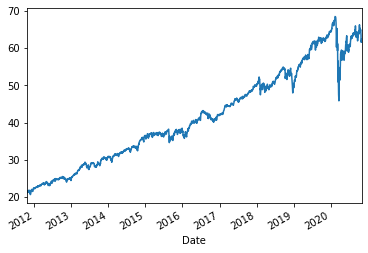

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt #描画ライブラリ
import pandas_datareader.data as web #データのダウンロードライブラリ
tsd = web.DataReader("usmv","yahoo","1980/1/1").dropna()#jpy
tsd.loc[:,'Adj Close'].plot()

　ダウンロードした株価は米国の上場投資信託(ETF)の~~リスクパリティ~~-最小分散ポートフォリオ戦略を用いたusmvです。

　このETFは安定した収益の獲得を目指し、最小分散ポートフォリオというアルゴリズムを用いて運用されています。

https://www.bloomberg.co.jp/quote/USMV:US

　ポートフォリの詳細はつぎURLよりExcel形式でダウンロード可能です。
https://www.blackrock.com/us/individual/products/239695/ishares-msci-usa-minimum-volatility-etf


### ダウジョーンズ

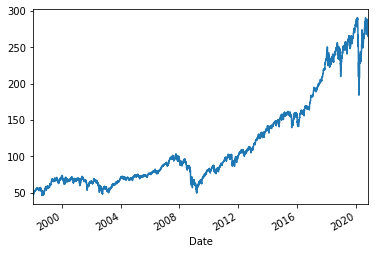

In [22]:
tsd = web.DataReader("dia","yahoo","1980/1/1").dropna()#jpy
tsd.loc[:,'Adj Close'].plot()

### ナスダック100

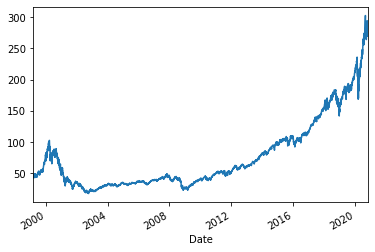

In [23]:
tsd = web.DataReader("qqq","yahoo","1980/1/1").dropna()#jpy
tsd.loc[:,'Adj Close'].plot()

　QQQはInvescoが運用するナスダック100連動のETFですが、そのポートフォリオの詳細はつぎのURLよりExcel形式でダウンロード可能です。

https://www.invesco.com/us/financial-products/etfs/holdings?ticker=QQQ

### 日経平均株価
　日本の代表的な株価指数である日経平均株価(日経225）もダウンロード可能です。

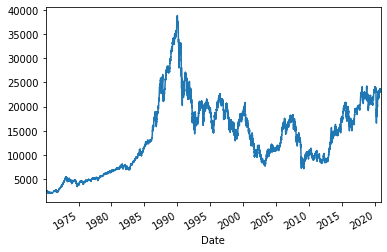

In [24]:
tsd = web.DataReader("^N225","yahoo","1970/1/4").dropna()#jpy
tsd.loc[:,'Adj Close'].plot()

　アベノミクス(2013年)以降の指数をダウンロードしてみましょう。

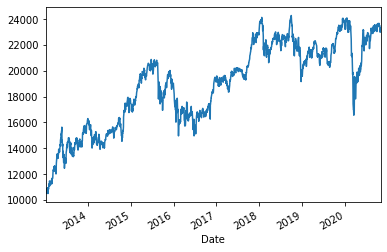

In [25]:
tsd.loc['2013':,'Adj Close'].plot()

## 主な株価指数の構成銘柄
### 代表的な[ナスダック100指数](https://ja.wikipedia.org/wiki/%E3%83%8A%E3%82%B9%E3%83%80%E3%83%83%E3%82%AF100%E6%8C%87%E6%95%B0)を構成する銘柄

　アメリカ経済を牽引する銘柄群です。

In [26]:
NDX=['AAL','AAPL','AMD','ALGN','ADBE','ADI','ADP','ADSK','ALXN','AMAT',
'AMGN','AMZN','ASML','ATVI','BIDU','BIIB','BMRN','BKNG','AVGO','CDNS',
'CERN','CHKP','CMCSA','COST','CSCO','CSX','CTAS','CTSH',
'CTXS','DLTR','EA','EBAY','EXPE','FAST','FB','FISV','FOX','FOXA',
'GILD','GOOG','GOOGL','HAS','HSIC','HOLX','IDXX','ILMN','INCY',
'INTC','INTU','ISRG','JBHT','JD','KHC','KLAC','LBTYB','LBTYA',
'LBTYK','LULU','LILA','LILAK','LRCX','MAR','MCHP','MELI','MNST',
'MSFT','MU','MXIM','MELI','MYL','NTAP','NFLX','NTES','NVDA','NXPI',
'ORLY','PAYX','PCAR','PYPL','PEP','QCOM','REGN','ROST','SBUX',
'SNPS','SIRI','SWKS','TMUS','TTWO','TSLA','TXN','KHC',
'ULTA','UAL','VRSN','VRSK','VRTX','WBA','WDC','WLTW','WDAY','XEL']

### 代表的な[ダウ平均株価指数](https://ja.wikipedia.org/wiki/%E3%83%80%E3%82%A6%E5%B9%B3%E5%9D%87%E6%A0%AA%E4%BE%A1)採用銘柄

「ダウ平均」、「ニューヨーク・ダウ」、「ニューヨーク平均株価」などとして親しまれている当指数は、チャールズ・ダウにより考え出され、1884年から算出されています。発表当初は鉄道株が中心でした。19世紀末には変わりゆく経済の姿を受け、1896年から新たなダウ工業株平均の算出が始まりました。その後ダウ工業株30種平均株価を構成する銘柄は時代の流れに合わせて入れ替えが行われています。今現在もっとも古くから採用されている銘柄はエクソンモービルで1928年から採用されています。

現在の構成銘柄は、

In [27]:
DJ=['AAPL','AMGN','AXP','BA','CAT','CRM','CSCO','CVX','DIS','DOW','GS','HD',
    'IBM','INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE',
    'PG','TRV','UNH','V','VZ','WBA','WMT']

2020年8月31日現在

|コード|銘柄|
|:-:|:-:|
|AAPL|アップル	コンピュータ
|MMGN |アムジェン
|AXP|アメリカン・エキスプレス|
|BA|ボーイング
|CAT|キャタピラー
|CRM|セールスフォース・ドットコム
|CSCO|シスコシステムズ
|CVX|シェブロン
|DIS|ウォルト・ディズニー・カンパニー
|DOW|ダウ
|GS	|ゴールドマン・サックス
|HD	|ホームデポ
|IBM|アイ・ビー・エム	コンピューター
|INTC|インテル	
|JNJ	|ジョンソン・エンド・ジョンソン
|JPM	|JPモルガン・チェース
|KO	|ザ コカ・コーラ カンパニー
|MCD	|マクドナルド	
|MMM	|スリーエム	
|MRK	|メルク
|MSFT	|マイクロソフト	
|NKE	|ナイキ	
|PG|プロクター・アンド・ギャンブル (P&G)
|TRV	|トラベラーズ	
|UNH	|ユナイテッド・ヘルス
|V	|Visa	
|VZ|ベライゾン・コミュニケーションズ
|WBA|ウォルグリーン・ブーツ・アライアンス
|WMT	|ウォルマート・ストアーズ
です。

## US Yahoo Financeからダウンロードできるその他の主な株価、指数、暗号通貨
### 代表的な世界の株価指数

In [28]:
index=["^DJI","^DJT","^DJU","^BANK","^IXCO","^NDX","^NBI",
       "^NDXT","^INDS","^INSR","^OFIN","^IXTC","^TRAN","^NYY","^NYI","^NY",
       "^NYL","^XMI","^OEX","^GSPC","^HSI","^FCHI","^BVSP","^N225","^RUA","^XAX"]

|||
|:---|:---:|
|^DJI | Dow Jones Industrial Average
| ^DJT | Dow Jones Trnsport
| ^DJU | Dow Jones Utility Average
| ^BANK | NASDAQ Bank
| ^IXCO | NASDAQ Computer
| ^NDX | NASDAQ-100
| ^NBI | NASDAQ Biotechnology
| ^NDXT| NASDAQ 100 Technology
| ^INDS | NASDAQ Industrial
| ^INSR | NASDAQ Insurance
| ^OFIN | NASDAQ Other Finance
| ^IXTC | NASDAQ Telecommunications
| ^TRAN | NASDAQ Transportation
| ^NYY | NYSE TMT INDEX
| ^NYI | NYSE INTL 100 INDEX
| ^NY | NYSE US 100 INDEX
| ^NYL | NYSE NY World Leader Index
| ^XMI | NYSE ACRA Major Market Index
| ^OEX | S&P 100 Index
| ^GSPC| S&P 500 Index
| ^HSI | Hang Seng Index
| ^FCHI | CAC 40
| ^BVSP | IBOVESPA
| ^N225 | Nikkei 225
| ^RUA | Russel 3000
| ^XAX | NY AMEX Composit Index
| ^SOX | PHLX Semiconductor Index

SOX指数はフィラデルフィア連銀による半導体株指数。半導体株の動向に大きな影響がある。

https://indexes.nasdaqomx.com/Index/Overview/SOX

### 代表的な米国ETF

In [29]:
ETF=['DIA','SPY','QQQ','IBB','XLV','IWM','EEM','EFA','XLP','XLY','ITB','XLU','XLF',
     'VGT','VT','FDN','IWO','IWN','IYF','XLK','XOP','USMV','BAB','GLD',
    'VNQ','SCHH','IYR','XLRE','AGG','BND','LQD','VCSH','VCIT','JNK']

### 代表的なS&P株

In [30]:
SP100=["AAPL","ABBV","ABT","ACN","AGN","AIG","ALL","AMGN","AMZN","AXP","BA","BAC","BIIB",
"BK","BLK","BMY","BRKB","C","CAT","CHTR","CL","CMCSA","COF","COP","COST","CSCO",
"CVS","CVX","DHR","DIS","DUK","EMR","EXC","F","FB","FDX","FOX","FOXA","GD","GE",
"GILD","GM","GOOG","GOOGL","GS","HAL","HD","HON","IBM","INTC","JNJ","JPM","KHC","KMI",
"KO","LLY","LMT","LOW","MA","MCD","MDLZ","MDT","MET","MMM","MO","MRK","MS","MSFT",
"NEE","NKE","ORCL","OXY","PEP","PFE","PG","PM","PYPL","QCOM","RTN","SBUX",
"SLB","SO","SPG","T","TGT","TXN","UNH","UNP","UPS","USB","UTX","V","VZ","WBA",
"WFC","WMT","XOM"]

### 代表的なバイオ・ヘルス株
主な[バイオ株](https://www.motleyfool.co.jp/archives/8206), [ヘルス株](https://www.ishares.com/us/products/239699/ishares-nasdaq-biotechnology-etf)は以下の通りです。


In [31]:
BIO=['GILD','VRTX','AMGN','BIIB','REGN','ILMN','SGEN','ALXN','INCY','BMRN','MRNA',
     'ALNY','SYN','NBIX','SRPT','EXEL','IONS','TECH','MYL','ACAD','NKTR','ALKS',
     'BLUE','JAZZ','QGEN','NBIX','SAGE','UTHR','ABBV','INO','VXRT']
HLT=['JNJ','UNH','MRK','PFE','ABT','BMY','AMGN','LLY','TMO','MDT','DHR','CVS','BDX',
     'VRTX','CI','ANTM','AGN','ISRG','ZTS','CERN','HSIC','HOLX','IDXX','MYL','WBA',
     'XRAY','ABBV']

最近の動向については
[Python3ではじめるシステムトレード：新型コロナで見ておくべきバイオ・ヘルス株(長期投資と短期投資）](https://qiita.com/innovation1005/items/07b0484518fd3dd46904)
を参照してください。また、第2波に注目して
[OVID-19：第2波をオンラインダッシュボードで察知](https://qiita.com/innovation1005/items/f45a51fe4f541c91ec99)

### 代表的な暗号通貨

https://finance.yahoo.com/cryptocurrencies

In [32]:
ccurrency=["BTC-USD","XRP-USD","ETH-USD","LTC-USD","BCH-USD","BNB-USD",
       "EOS-USD","USDT-USD","LINK-USD","TRX-USD","ADA-USD",
       "XLM-USD","XMR-USD","DASH-USD","NEO-USD","IOT-USD",
       "VEN-USD","ETC-USD","XEM-USD","ZEC-USD","XRB-USD","QTUM-USD",
       "BTG-USD","BAT-USD","DOGE-USD"]


|||
|:---|:---:|
|Bitcoin USD| BTC-USD
|Ripple USD |XRP-USD
|Ethereum USD| ETH-USD
|Litecoin USD| LTC-USD
|Bitcoin Cash / BCCUSD |BCH-USD
|Binance Coin USD| BNB-USD
|EOS USD| EOS-USD
|Tether USD |USDT-USD
|ChainLink USD |LINK-USD
|Tronix USD |TRX-USD
|Cardano USD |ADA-USD
|Stellar USD|XLM-USD
|Monero USD |XMR-USD
|DigitalCash USD| DASH-USD
|NEO USD |NEO-USD
|IOTA USD |IOT-USD
|Vechain USD| VEN-USD
|Ethereum Classic USD| ETC-USD
|NEM USD |XEM-USD
|ZCash USD| ZEC-USD
|Nano USD |XRB-USD
|QTUM USD |QTUM-USD
|Bitcoin Gold USD |BTG-USD
|Basic Attention Token USD| BAT-USD
|Dogecoin USD |DOGE-USD

# 長期と中期のリスクとリターンの関係を見る

## ダウ工業株30種平均に採用されている銘柄をダウンロードしてリターンとリスクをみる

これらの銘柄の株価をpandas datareaderを用いてダウンロードしてみましょう。まず最初はリーマンショック以降のデータを見てみましょう。データを取得したら年率換算の平均リターンを求めて、年率換算の標準偏差を計算します。これらには価格の対数の差を用います。年率換算された対数価格差の標準偏差をボラティリティと呼びます。また、平均リターンをボラティリティで割って単位ボラティリティ当たりのリターンを求めてみましょう。

 01 AAPL    平均 0.29 ボラティリティ  0.28 m/v  1.04  データ数      2729
 02 AMGN    平均 0.16 ボラティリティ  0.25 m/v  0.63  データ数      2729
 03 AXP     平均 0.10 ボラティリティ  0.28 m/v  0.34  データ数      2729
 04 BA      平均 0.12 ボラティリティ  0.35 m/v  0.35  データ数      2729
 05 CAT     平均 0.13 ボラティリティ  0.29 m/v  0.46  データ数      2729
 06 CRM     平均 0.26 ボラティリティ  0.36 m/v  0.73  データ数      2729
 07 CSCO    平均 0.07 ボラティリティ  0.27 m/v  0.24  データ数      2729
 08 CVX     平均 0.03 ボラティリティ  0.27 m/v  0.11  データ数      2729
 09 DIS     平均 0.14 ボラティリティ  0.24 m/v  0.59  データ数      2729
 10 GS      平均 0.03 ボラティリティ  0.29 m/v  0.09  データ数      2729
 11 HD      平均 0.26 ボラティリティ  0.23 m/v  1.11  データ数      2729
 12 IBM     平均 0.02 ボラティリティ  0.22 m/v  0.08  データ数      2729
 13 INTC    平均 0.11 ボラティリティ  0.28 m/v  0.38  データ数      2729
 14 JNJ     平均 0.10 ボラティリティ  0.17 m/v  0.62  データ数      2729
 15 JPM     平均 0.11 ボラティリティ  0.29 m/v  0.39  データ数      2729
 16 KO      平均 0.09 ボラティリティ  0.17 m/v  0.52  データ数      2729
 17 MCD     平均 0.15 ボラティリティ  0.19 m/v  0

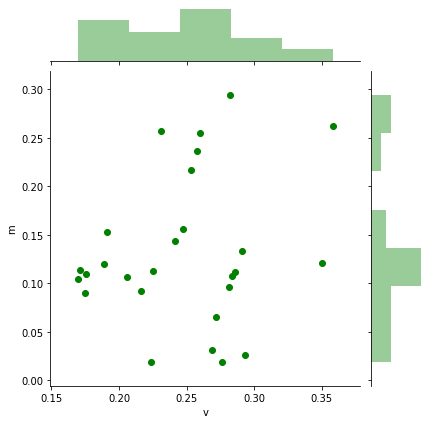

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
m=[]#それぞれの株価の年率換算平均のデータを保存
v=[]#それぞれの株価の年率換算した標準偏差を保存
j=0
for i in range(len(DJ)):
    tsd=web.DataReader(DJ[i], "yahoo",'2010/1/1')#株価データのダウンロード
    if len(tsd)>2000:
        tsd2=web.DataReader(DJ[i], "yahoo",'1980/1/1','2009/12/31')#株価データのダウンロード
        if len(tsd2)>1000:
            lntsd=np.log(tsd.iloc[:,5])#データの自然対数を取る
            m.append((lntsd.diff().dropna().mean()+1)**250-1)
            v.append(lntsd.diff().dropna().std()*np.sqrt(250))
            print('{0: 03d}'.format(j+1),'{0:7s}'.format(DJ[i]),'平均{0:5.2f}'.format(m[j]),
              'ボラティリティ {0:5.2f}'.format(v[j]),'m/v {0:5.2f}'.format(m[j]/v[j]),
              ' データ数{0:10d}'.format(len(tsd)))
            j+=1
v_m=pd.DataFrame({'v':v,'m':m})
sns.jointplot(x='v',y='m',data=v_m,color="g")


結果はつぎのとおりです。ここでプログラムのコードを見て対数について苦手な方は[システムトレードにおける対数の役割](https://qiita.com/innovation1005/items/5460a440b72c3c46375b)を参照してください。

なんとリスクとリターンの比率が1を超えるものがいくつかあります。


つぎにさらに長い期間のデータをダウンロードしてデータを分析してみましょう。

 01 AAPL    平均 0.15 ボラティリティ  0.51 m/v  0.30  データ数      7330
 02 AMGN    平均 0.21 ボラティリティ  0.43 m/v  0.48  データ数      6696
 03 AXP     平均 0.18 ボラティリティ  0.37 m/v  0.48  データ数      7572
 04 BA      平均 0.12 ボラティリティ  0.31 m/v  0.37  データ数      7572
 05 CAT     平均 0.14 ボラティリティ  0.32 m/v  0.45  データ数      7572
 06 CRM     平均 0.30 ボラティリティ  0.54 m/v  0.55  データ数      1393
 07 CSCO    平均 0.33 ボラティリティ  0.47 m/v  0.71  データ数      5010
 08 CVX     平均 0.20 ボラティリティ  0.28 m/v  0.72  データ数      7572
 09 DIS     平均 0.15 ボラティリティ  0.32 m/v  0.48  データ数      7572
 10 GS      平均 0.09 ボラティリティ  0.44 m/v  0.21  データ数      2684
 11 HD      平均 0.29 ボラティリティ  0.41 m/v  0.69  データ数      7136
 12 IBM     平均 0.14 ボラティリティ  0.28 m/v  0.49  データ数      7572
 13 INTC    平均 0.15 ボラティリティ  0.43 m/v  0.35  データ数      7519
 14 JNJ     平均 0.41 ボラティリティ  0.31 m/v  1.30  データ数      7572
 15 JPM     平均 0.17 ボラティリティ  0.38 m/v  0.44  データ数      7519
 16 KO      平均 0.26 ボラティリティ  0.27 m/v  0.96  データ数      7572
 17 MCD     平均 0.31 ボラティリティ  0.29 m/v  1

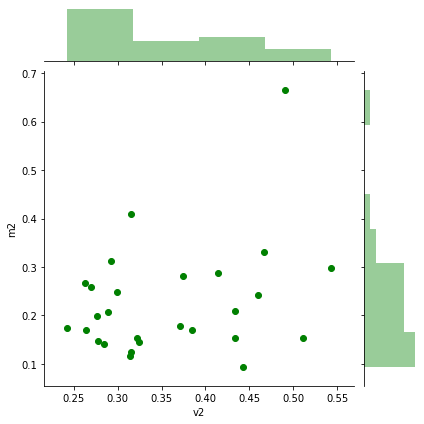

In [34]:
m2=[]#それぞれの株価の年率換算平均のデータを保存
v2=[]#それぞれの株価の年率換算した標準偏差を保存
j=0
for i in range(len(DJ)):
    tsd=web.DataReader(DJ[i], "yahoo",'2010/1/1')#株価データのダウンロード
    if len(tsd)>2000:
        tsd2=web.DataReader(DJ[i], "yahoo",'1980/1/1','2009/12/31')#株価データのダウンロード
        if len(tsd2)>1000:
            lntsd=np.log(tsd2.iloc[:,5])#データの自然対数を取る
            m2.append((lntsd.diff().dropna().mean()+1)**250-1)
            v2.append(lntsd.diff().dropna().std()*np.sqrt(250))
            print('{0: 03d}'.format(j+1),'{0:7s}'.format(DJ[i]),'平均{0:5.2f}'.format(m2[j]),
              'ボラティリティ {0:5.2f}'.format(v2[j]),'m/v {0:5.2f}'.format(m2[j]/v2[j]),
              ' データ数{0:10d}'.format(len(tsd2)))
            j+=1
v_m2=pd.DataFrame({'v2':v2,'m2':m2})
sns.jointplot(x='v2',y='m2',data=v_m2,color="g")

驚くことにこちらにもリスクとリターンの比率が１を超えるものがあります。

ぎにリターンとボラティリティの比率を2つの期間についてプロットしてみましょう。

Text(0.5, 0, '1975-now')

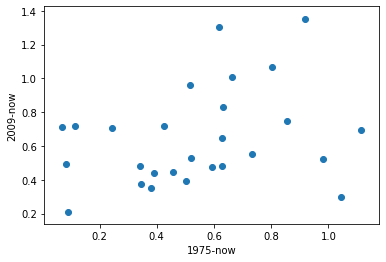

In [35]:
plt.scatter(v_m.m/v_m.v,v_m2.m2/v_m2.v2)
plt.ylabel('2009-now')
plt.xlabel('1975-now')

なんと期間にかかわらず同じような比率を維持しています。

時間を味方につけること。これがとにかく成功する近道です。長期間にわたり収益率/リスクの高い企業はいつでもビジネスで成功しているという企業ではありません。何か不祥事を起こしてもまた立ち直れる企業ということです。

さて、ここまでの分析で重要なことをまだ説明していません。それはデータを分析することで何が得られるのかという点です。多くに人は何か理論的な背景を得られるのではと考えていませんか？実はそのような理由ではありません。あるのは株価の動きのパターンを見極めたいという思いです。ではなぜパターンが大事なのでしょうか？それはあなた自身のリスク許容能力をつかむためです。株式を売らずに持ち続けることは簡単なことではありません。株価が下落すれば、すごに売りたくなってしまいます。でもそれでは効率的な投資にはなりません。そこであなたがどの程度の下落に「どきどき」しないで耐えられるのかをまずつかむ必要があります。そしてそのレベルをつかんだら、そのパターンを収益率/リスクで測ろうとしているのです。そして、それがつかめたら、同じパターンをもつ株をまず探して、そのリストから分散投資するための銘柄を選べばいいのです。そのために統計分析が必要なのです。決して、理論的な理由を探して、それをよりどころに投資をするからではありません。「知的ゲーム」は危険な「遊び」です。




# 本記事に用いたPythonプログラムコードは　[https://github.com/innovation1005/qitta_innovation1005](https://github.com/innovation1005/qitta_innovation1005)　 からダウンロード可能です。いつでもデータのアップデートが可能になります。

# 特にシステムトレードに興味のある方
[システムトレードってなに？]( https://qiita.com/innovation1005/items/2b5a291b98ebf39dfd8b)
[リスクマネジメントって何？]( https://qiita.com/innovation1005/items/8419cda5d57f9f7b1a85)
[Python3ではじめるシステムトレード：新型コロナで見ておくべきバイオ・ヘルス株](https://qiita.com/innovation1005/items/07b0484518fd3dd46904)
[statsmodelsによる統計的仮説検定 入門](https://qiita.com/innovation1005/items/00362c2129bfe25fe272)

# 予測に興味のある方

 予測について　https://qiita.com/innovation1005/items/76d8a93c261e7d357ab8

# 経済データのダウンロード

https://qiita.com/innovation1005/items/edcf78cbf89477b3b0a7

# 外国為替に興味のある方

外国為替レートについて　https://qiita.com/innovation1005/items/f5cef6f6e3d1c97d17d1

# 高頻度取引について

グロスマン・ミラーモデル(翻訳) https://qiita.com/innovation1005/items/8f3da94f6af3e05fa461

# 人工知能関連

[誰でもわかるニューラルネットワーク：アプリのように動かす人工知能ーテンソルフロープレイグラウン](https://qiita.com/innovation1005/items/e269d8bac3032e34fd15)

[誰でもわかるニューラルネットワーク：正則化をテンソルフロープレイグラウンドで試してみた　](
https://qiita.com/innovation1005/items/e6f035d74675d94744c8)


# 参考


「タートル流投資の魔術](徳間書店)
Pandas datareader (https://pandas-datareader.readthedocs.io/en/latest/)

<A HREF="http://www.tradersshop.com/bin/showprod?a=17600&b=1&c=9784775991473">
     <IMG SRC="http://www.tradersshop.com/images/prod/9784775991473.jpg"BORDER=1 WIDTH=70 HEIGHT=100 
      「画像をクリックしていただくとpanrollingのホームページから書籍を購入していただけます。」</A>
<A HREF="http://www.tradersshop.com/bin/showprod?a=17600&b=1&c=9784775970270">
     <IMG SRC="http://www.tradersshop.com/images/prod/9784775970270.jpg"BORDER=1 WIDTH=70 HEIGHT=100 
      「画像をクリックしていただくとpanrollingのホームページから書籍を購入していただけます。」</A>
      </A>